# Running real-life data periodograms
-----------------------------------

### In this notebook we will use the full PDC tests panel to explore real-life observations.
The chosen example is presented here - https://arxiv.org/abs/2111.02383 :

S Mus is a spectroscopic binary Cepheid with 505 d orbital and 9.65996 d pulsational periods.

This notebook shows how to calculate the PDC periodograms for S Mus, distinguishing the two periodic signals.

### 1 Imports & funcs

In [1]:
import sys

In [2]:
from sparta.Auxil.PeriodicityDetector import PeriodicityDetector
from sparta.UNICOR.Spectrum import Spectrum
from sparta.UNICOR.Template import Template
from sparta.Auxil.TimeSeries import TimeSeries
from sparta.Observations import Observations
import numpy as np
import random
from scipy import interpolate
from PyAstronomy import pyasl
import matplotlib.pyplot as plt
from scipy import signal
import winsound
from copy import deepcopy
import pandas as pd

### 2 Using the PeriodicityDetector class to run PDC on simulated velocity times series

`Observations` class enables one to load observation data from a given folder 
and place it into a TimeSeries object.

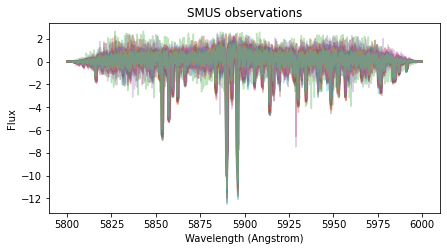

In [3]:
# One has to define how the observation files will be read and processed.
# This can be done using the load_spectrum_from_fits function in the ReadSpec.py file.

obs_data = Observations(survey="CORALIE", sample_rate=1, min_wv=5800, max_wv=6000)

for i in obs_data.time_series.vals:
    i = i.SpecPreProccess()
    
plt.figure(figsize=(7, 3.5)) 
plt.title("SMUS observations")
plt.ylabel("Flux")
plt.xlabel("Wavelength (Angstrom)")

for s in obs_data.time_series.vals:
    plt.plot(s.wv[0], s.sp[0], alpha=0.3)

plt.show()

In [4]:
obs_data.time_series.size

60

In [5]:
# The observation_TimeSeries instance inside obs_data now contains a list of Spectrum objects  
obs_data.time_series.vals

In [6]:
# In this case, we chose to load a list of radial velocities calculated in advance.
# One can also calculate them using the UNICOR_quickstart.ipynb notebook.

columns_to_keep = ['jdb', 'vrad', 'noise']
df = pd.read_table(r"C:\Users\avrah\Desktop\ביני\Downloads\all_ready\SMus_RVdata.dat", sep="\s+", usecols=columns_to_keep)
pre_calculated_vrads = df.vrad[1:61].astype(float).values
print(pre_calculated_vrads)

[ -1.49505   1.29716   1.95317  14.19994  22.70826  26.82736  16.81139
  -1.99621   2.90902   0.6491   -8.26263  -5.3408   14.99846 -17.90789
  -9.51428  -0.71575 -21.06917 -24.71726   2.31752   2.81708   5.64296
   6.53584   5.47378  14.51555  22.29035  30.16557  25.81942   6.8504
   6.24046   5.64655   6.69597   4.80803  22.58587   3.09032   5.41104
   3.26796 -24.11813 -19.56516 -10.38496  -2.11476   1.46929 -22.89345
 -15.53722  -6.39836   1.06186  -0.2883    4.36749   4.0204  -12.91478
 -22.7698  -20.59314 -17.71461 -17.6889  -16.65113  -7.52902   0.96255
   7.23521   0.97946 -17.38601 -20.77258]


Initializing and running PeriodicityDetector

In [7]:
# Choosing frequency range and frequency resolution for the periodograms.
obs_data.initialize_periodicity_detector(freq_range=(1 / 5_000, 0.33), periodogram_grid_resolution=5_000) 

# Setting the known periods, so they are calculated in the plots
obs_data.periodicity_detector.period_truth = [41, 9.66, 505]

In [8]:
obs_data.time_series.calculated_vrad_list = pre_calculated_vrads

done calc_GLS
done calc_PDC
done calc_USURPER
done calc shift_periodogram
done calc shape_periodogram


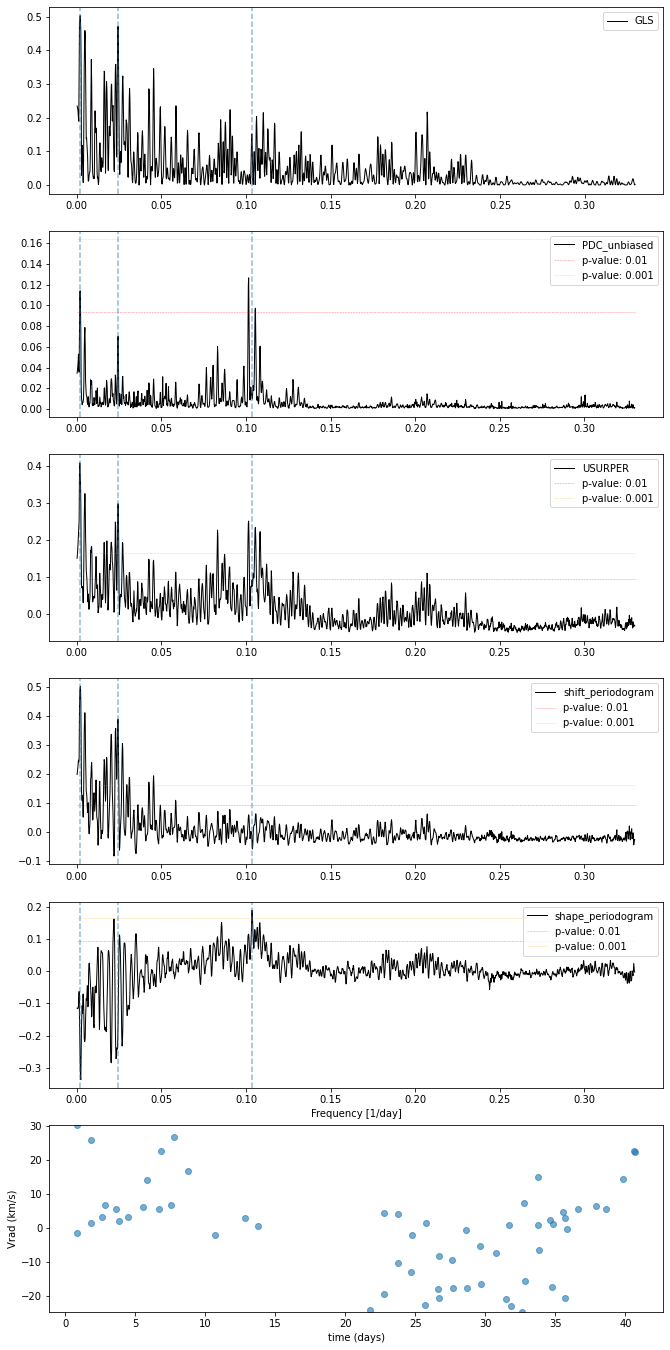

In [9]:
obs_data.periodicity_detector.calc_GLS()
print("done calc_GLS")

obs_data.periodicity_detector.calc_PDC(calc_biased_flag=False, calc_unbiased_flag=True, fast=True)
print("done calc_PDC")

obs_data.periodicity_detector.calc_USURPER(calc_biased_flag=False, calc_unbiased_flag=True)
print("done calc_USURPER")

obs_data.periodicity_detector.calc_partial_periodogram(partial_type="shift")
print("done calc shift_periodogram")

obs_data.periodicity_detector.calc_partial_periodogram(partial_type="shape")
print("done calc shape_periodogram")

obs_data.periodicity_detector.plot_periodograms(annotate_pval=[1e-2,1e-3], plot_vals=True)
plt.show()

# Activate noise to indicate end of run
frequency = 2500  # Set Frequency To 2500 Hertz
duration = 500  # Set Duration To 1000 ms == 1 second
winsound.Beep(frequency, duration)


Note that as they are designed to do, the partial USuRPER presents only the pulsation period, while the partial PDC only present the orbital period.

P-value for the periodograms was calculated based on the methodology presented in - https://arxiv.org/abs/1912.12150